# 6.4 Supervised Machine Learning: Regression

### Step 1&2: 
- Install the scikit-learn library.  
- Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import dataset
path = r'/Users/minglunchen/Desktop/A6_Project_Yiru'
df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'heart_2022_no_nans.csv'), index_col = False)

In [3]:
df_heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### Step 3: Clean your data so that it’s ready for analysis.

In [4]:
df_heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [5]:
df_heart.shape

(246022, 40)

In [6]:
# Many variables in the dataset are binary, I create a new dataframe replacing the text with '1' and '0' to make them easier to proceed.
df_replace =  df_heart[df_heart.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0, 'Yes, but only during pregnancy (female)':'1', 'No, pre-diabetes or borderline diabetes':'0', 'Tested positive using home test without a health professional': '1'})

In [7]:
# There are too many variables, I therefore create a subset including numerical and most critical variables. 
sub = df_replace[['HadHeartAttack', 'Sex', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 
                  'HadAngina', 'HadStroke', 'HadDiabetes', 'BMI']]

In [8]:
sub.head()

,HadHeartAttack,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadDiabetes,BMI
0,0,0,4.0,0.0,1,9.0,0,0,0,27.99
1,0,1,0.0,0.0,1,6.0,0,0,1,30.13
2,0,1,0.0,0.0,0,8.0,0,0,0,31.66
3,0,0,5.0,0.0,1,9.0,0,0,0,31.32
4,0,0,3.0,15.0,1,5.0,0,0,0,33.07


*Missing Values*

In [9]:
# Check for missing values
sub.isnull().sum()

HadHeartAttack        0
Sex                   0
PhysicalHealthDays    0
MentalHealthDays      0
PhysicalActivities    0
SleepHours            0
HadAngina             0
HadStroke             0
HadDiabetes           0
BMI                   0
dtype: int64

-- No missing values.

*Duplicates*

In [10]:
dups = sub.duplicated()
dups.shape

(246022,)

-- No duplicates.

### Step 4: Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

Based on the heatmap made in E6.2, I decide to investigate the relationship between 'BMI' and 'PhysicalHealthDays' which are two numerical variables.

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


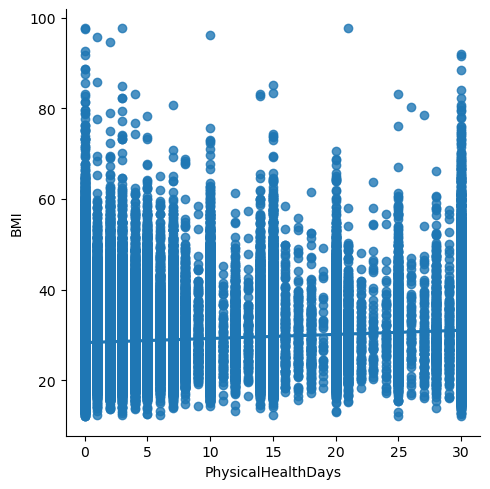

In [11]:
# Create a scattotplot for these two selected variables
sca_phy_bmi = sns.lmplot(x = 'PhysicalHealthDays', y = 'BMI', data = sub)

### Step 5: State your hypothesis in a markdown cell within your Jupyter notebook.

**Hypothesis** based on the observation of the scattorplot:  
The potential relationship between 'PhysicalHealthDays' and 'BMI' may be a slight positive one: with the increase of the physical health days, the BMI slightly increases.

### Step 6: Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = sub['PhysicalHealthDays'].values.reshape(-1,1)
y = sub['BMI'].values.reshape(-1,1)

In [13]:
X

array([[4.],
       [0.],
       [0.],
       ...,
       [0.],
       [2.],
       [0.]])

In [14]:
y

array([[27.99],
       [30.13],
       [31.66],
       ...,
       [29.86],
       [28.66],
       [32.55]])

### Step 7: Split the data into two sets: a training set and a test set.

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Step 8: Run a linear regression on the data.  
- First, fit the model you created to the training set.  
- Then, create a prediction for y on the test set.


In [16]:
# Create a regression object (to be fit onto the training set).
regression = LinearRegression()  

In [17]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

### Step 9: Create a plot that shows the regression line on the test set.

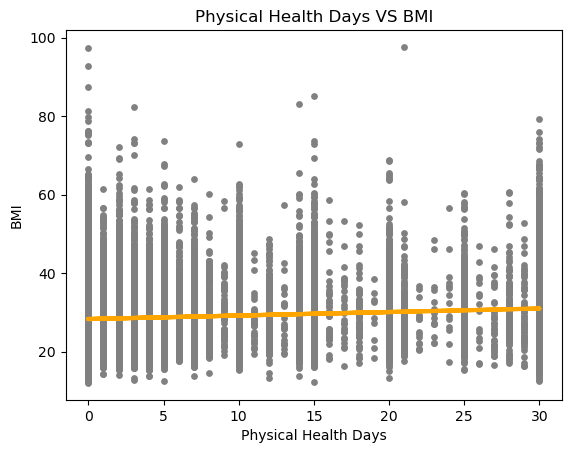

In [19]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.title('Physical Health Days VS BMI')
plot_test.xlabel('Physical Health Days')
plot_test.ylabel('BMI')
plot_test.show()

### Step 10: Write your own interpretation of how well the line appears to fit the data in a markdown cell.

**Interpretation:**  
The linear model represented by the orange regression line does NOT perfectly cover all of those data points, or I would say it barely covers data points. I therefore expect a very low fitness.

### Step 11: Check the model performance statistics—MSE and R2 score.

In [20]:
# Calculate mean squared error and R2
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics to evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08935258]]
Mean squared error:  42.15942924481173
R2 score:  0.014466851564973626


**Interpretation:**  
The very low R2 score (0.0145) indicated a very weak fitness.

### Step 12: Compare the predicted y values with the actual y values in a dataframe.

In [22]:
y_predicted

array([[30.0879111 ],
       [28.30085946],
       [28.47956462],
       ...,
       [28.30085946],
       [28.30085946],
       [28.30085946]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.
df_act_pred_y = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_act_pred_y.head(30)

,Actual,Predicted
0,25.77,30.087911
1,27.44,28.300859
2,27.26,28.479565
3,34.01,28.300859
4,22.96,28.300859
5,27.81,28.300859
6,26.54,28.300859
7,21.02,30.981437
8,53.38,30.981437
9,39.31,29.641148


In [24]:
# Compare how the regression fits the training set to avoid overfit
# Predict X_train
y_predicted_train = regression.predict(X_train)

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08935258]]
Mean squared error:  41.720070026035394
R2 score:  0.013316321032487588


**Interpretation:**  
The model fits the training set (0.0133) is only slightly different compared with the test set (0.0145), it indicates I do NOT overfit my model.

### Step 13: Include your thoughts on how well the model performed on the test set in a markdown cell.  
- Include any reflections you have on the impact of possible data bias.

**Thoughts & Refelctions:**  
- After looking at the model performacne statistics, it is pretty clear that my model is NOT performing well.   
- It is not surprised since the BMI is not directly related to the poor physical health days, it is calculated with the height and weight of an individual. Although the weight and height may have influence on the poor physical health days, but it was not investigated in this regard.  
- The distribution of BMI was checked in E6.2 (histogrm), there were no obvious 'outliers'. Moreover, data was from real survey, I would retain all of them to avoid distorting reality ad potentially biasing the model.